# Neural Networks for Handwritten Digit Recognition

Here,we will use a neural network to recognize the hand-written digits 0-9.


# Outline of Project
1. Packages/Library used
2. Problem Statement
3. Dataset
4. Data Normalisation
5. Reshaping the image to feed into neural network
6. Data Visualisation
7. Tensorflow Model Training
8. Train Loss and Test Loss visualisation
9. Prediction on random set of  64 images.





## Packages/Libraries Used

In [94]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

## Problem Statement

We will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

##Dataset
We will use MNIST database for this task available in the tensorflow library.

1. The load_data() function shown below loads the data into variables
x_train,y_train,x_test and y_test.
2. The data set contains 70000 examples of handwritten digits.
3. We split it into 60000 train and 10000 test examples
4. Each training example is a 28-pixel x 28-pixel grayscale image of the digit.
5. Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
6. The 28 by 28 grid of pixels is “unrolled” into a 784-dimensional vector.
7. Each training examples becomes a single row in our data matrix X.
This gives us a 60000 x 784 matrix x_train where every row is a training example of a handwritten digit image.
8. The second part of the training set is a 60000 x 1 dimensional vector y that contains labels for the training set.
For example, y = 0 if the image is of the digit 0, y = 4 if the image is of the digit 4 and so on.

In [79]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## Data Normalisation
We normalise the image by dividing it by max_val=255

In [80]:
x_train=x_train/255
x_test=x_test/255


## Reshaping Data-
Converting the 2-d image of 28*28 into single vector of 784 size.

In [81]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
y_test=y_test.reshape(10000,1)
y_train=y_train.reshape(60000,1)

In [82]:
print ('The shape of X is: ' + str(x_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (60000, 784)
The shape of y is: (60000, 1)


## Visualisation of Data- Images

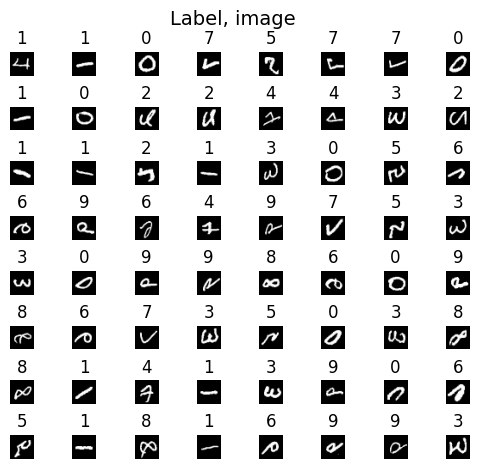

In [83]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((28,28)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Tensorflow Neural Network Model
We use Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network.We also use a dropout layer to avoid overfitting.

**Softmax placement**

In order to improve numerical softmax is grouped with the loss function rather than the output layer during training.
Therefore while model building we do the following:

In the final Dense layer we use a 'linear' activation. This is effectively no activation.

The model.compile statement will indicate this by including from_logits=True. *loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)*

Using the model:

The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

In [137]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(784,)),
        Dense(128,activation='relu',name='L1'),
        Dense(128,activation='relu',name='L2'),
        Dropout(0.2),
        Dense(10,activation='linear',name='L3')
        ### END CODE HERE ###
    ], name = "my_model"
)

In [138]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
[layer1, layer2,dropout, layer3] = model.layers

In [140]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 128), b2 shape = (128,)
W3 shape = (128, 10), b3 shape = (10,)


In [141]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train,y_train,
    epochs=10,validation_data=(x_test,y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4496 - val_loss: 0.1241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1228 - val_loss: 0.1226
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0852 - val_loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0608 - val_loss: 0.0900
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0494 - val_loss: 0.0845
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0416 - val_loss: 0.0892
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0358 - val_loss: 0.0884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0301 - val_loss: 0.0895
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0294 - val_loss: 0.0986
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0236 - val_loss: 0.0961


In [142]:
def plot_loss_tf(losses):
  plt.plot(losses,label="Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend
  plt.show()
train_losses=history.history["loss"]
val_losses=history.history["val_loss"]


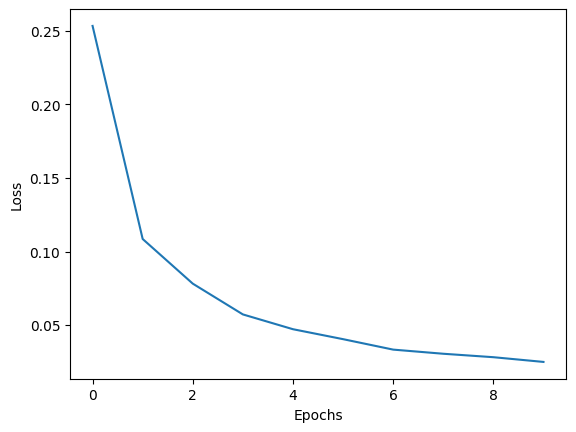

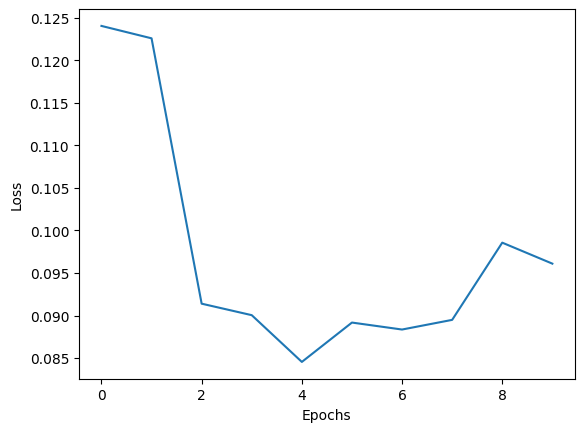

In [143]:
plot_loss_tf(train_losses)
plot_loss_tf(val_losses)

#### Prediction
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a zero.

In [151]:
image_of_zero = x_train[1015]
y_train[1015]

array([0], dtype=uint8)

In [152]:
prediction = model.predict(image_of_zero.reshape(1,784))  # prediction

print(f" predicting a zero: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
 predicting a zero: 
[[ 12.67718    -11.528883    -2.2023265  -11.10239    -12.564009
   -1.702927    -2.1043408   -2.340059    -0.84691364  -7.852463  ]]
 Largest Prediction index: 0


The largest output is prediction[0], indicating the predicted digit is a '0'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [153]:
## Prediction Probabilities
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Zero. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Zero. Probability vector: 
[[9.9999714e-01 3.0721290e-11 3.4507298e-07 4.7061098e-11 1.0911641e-11
  5.6858795e-07 3.8059741e-07 3.0067304e-07 1.3383186e-06 1.2136337e-09]]
Total of predictions: 1.000


In [154]:
# Predicting the class
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0


**Predicting over a random set of 64 images.**

Let's compare the predictions vs the labels for a random sample of 64 digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━

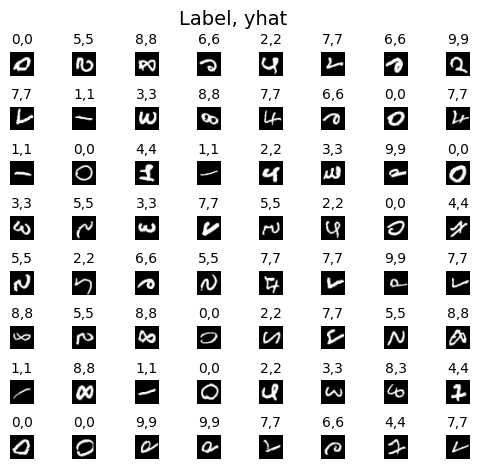

In [156]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28,28)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(x_test[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y_test[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()